<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/%E6%96%9C%E9%9D%A2%E9%81%8B%E5%8B%95%E5%AF%A6%E9%A9%97(%E8%AA%A4%E5%B7%AE%E5%AF%A6%E9%A9%97).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##斜面運動實驗分析
利用 SciPy 找出位移與時間之間的函數關係。

載入 numpy, matplotlib.pyplot 等函式庫。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

建立實驗數據:xdata 位移, ydata 時間

In [ ]:
xdata=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ydata=np.array([0.44,0.63,0.77,0.89,1.0,1.09,1.18,1.26,1.34,1.41])
rng = np.random.default_rng()
ydata_err=0.05 * rng.normal(size=xdata.size)
ydata=ydata+ydata_err

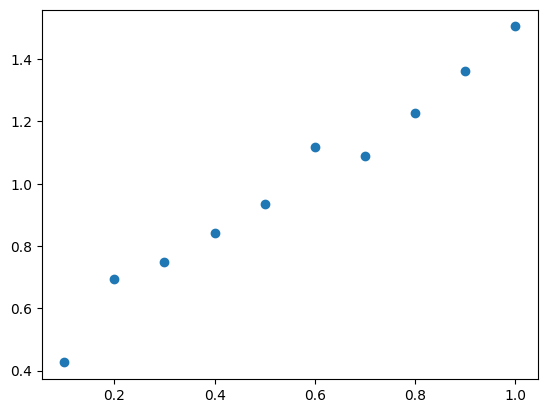

In [ ]:
plt.plot(xdata,ydata,'o')

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def func(x,a,b):
   y= a*np.power(x,b)
   return y

In [ ]:
parameters, covariance =curve_fit(func,xdata,ydata)

In [ ]:
print(parameters)

[1.42259961 0.53000975]


擬合結果：$t=1.42*x^{0.53}$

In [ ]:
fit_A=parameters[0];fit_B=parameters[1]

In [ ]:
fit_y=func(xdata,fit_A,fit_B)

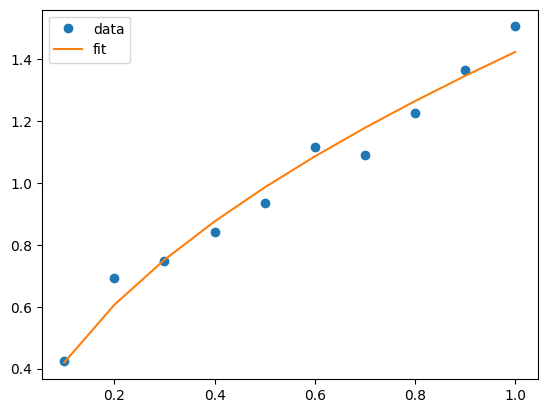

In [ ]:
plt.plot(xdata,ydata,'o',label='data')
plt.plot(xdata,fit_y,'-',label='fit')
plt.legend()

如何評估上述擬合與實際數據間的誤差？方法是透過前面擬合時計算的共變矩陣 covariance
\begin{equation}
Cov(a,a)=\frac{1}{N-1}\sum_{i=1}^{N}(a_i-\bar{a})(a_i-\bar{a})\\
Cov(a,b)=Cov(b,a)=\frac{1}{N-1}\sum_{i=1}^{N}(a_i-\bar{a})(b_i-\bar{b})\\
Cov(b,b)=\frac{1}{N-1}\sum_{i=1}^{N}(b_i-\bar{a})(b_i-\bar{b})
\end{equation}
其中，$i=1,\cdots,N$ 代表對應的數據點次序。


In [ ]:
print(covariance)

[[0.00123787 0.00092898]
 [0.00092898 0.00150768]]


計算共變矩陣的對角線矩陣元的平方根，代表對應擬合參數的誤差。

In [ ]:
perror=np.sqrt(np.diag(covariance))
print(perror)

[0.03518334 0.03882881]


結果表示為：$a\pm \sigma_a=1.42\pm 0.035, b\pm\sigma_b= 0.53\pm 0.038$

從上面結果觀察，發現參數 $a,b$ 的誤差小於其平均值，表示 $a,b$ 的可信度不錯。因此，最後結果可近似為 $y=1.42 *x^{0.53}$。
對應的物理模型為 $t=1.42*x^{0.53}$

計算擬合的評估參數 $R^2=1-\frac{SS_{res}}{SS_{tot}}$,殘差總和　$SS_{res}$ 及　總和平方$SS_{tot}$　的定義如下

\begin{equation}
SS_{res}=\sum_{i=1}^{N}(y^{expt}_i-y^{fit}_i)^2
\end{equation}

In [ ]:
SSres=np.sum(np.square(func(xdata, fit_A, fit_B)- ydata ))
print(SSres)

0.028517490479169526


\begin{equation}
SS_{tot}=\sum_{i=1}^{N}(y^{fit}-y_{mean})^2+\sum_{i=1}^{N}(y^{expt}-y^{fit})^2
\end{equation}

\begin{equation}
y_{mean}=\frac{1}{N}\sum_{i=1}^{N}y^{expt}_i
\end{equation}

In [ ]:
ydata_mean=np.mean(ydata)
SStot=np.sum(np.square(ydata-ydata_mean))

In [ ]:
R_square=1-SSres/SStot
print(R_square)

0.9707758277047303


$R^2=0.97$